In [109]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'Malgun Gothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

## 부산광역시_관광실태조사(관광지별인구비율 활용가능)

In [110]:
#라이브러리 import
import requests
import json
import pandas as pd
import numpy as np

encoding = "jontL0U%2Bm59elSyAzGmhMywZX6BmsoI2tYFDCf%2BRupOs3LN8zP7r4EH1vCF2P%2FymojoeF8IRUBayRvw3FObFNQ%3D%3D"
decoding = "jontL0U+m59elSyAzGmhMywZX6BmsoI2tYFDCf+RupOs3LN8zP7r4EH1vCF2P/ymojoeF8IRUBayRvw3FObFNQ=="
url = 'http://apis.data.go.kr/6260000/BusanTourStaticService2/getVisitorStatInfo2'
params ={'serviceKey' : decoding, 
         'numOfRows' : '100', 
         'pageNo' : '1',
         'resultType' : 'json' }

response = requests.get(url, params=params)
if response.status_code == 200:
    print('Success at Calling API')
    contents = response.content
else:
    print("Fail at Calling API")

Success at Calling API


In [111]:
json_visitor = json.loads(contents)
# json_visitor['response']['body']['items']['item']

In [112]:
body = json_visitor['response']['body']['items']['item']
df_busan_visitor = pd.json_normalize(body)
df_busan_visitor = df_busan_visitor.set_index("spot")
df_busan_visitor.head()

,agesixties,teens,agetwenties,agethirties,ageforties,agefifties,provincegangwon,provincegyeonggi,provincegyeongnam,provincegyeongbuk,...,clothing,beauty,sports,grocery,travel,electronic,service,oiling,car,online
spot,,,,,,,,,,,,,,,,,,,,,
"BIFF광장·용두산공원,보수동책방골목",299052,113008,400169,383953,417484,357539,47200,406039,345244,102721,...,2586385764,921787813,1879219481,460363898,149356280,42717430,10298170,0,118393204,25677805
감천문화마을,29615,14367,38767,35328,42599,36946,6825,41568,41715,10230,...,160144599,33826994,103252640,173970977,0,23205510,28450666,0,0,0
광안리 해수욕장,81907,45022,251765,191372,154270,120878,17237,183784,117171,42849,...,856048107,611619991,1330741424,382925012,2276886360,29378300,264361516,0,648577362,0
국립해양박물관,12701,6175,17562,16876,19396,17193,2924,20535,10792,4025,...,0,0,0,0,0,0,0,0,0,0
"다대포 해수욕장(꿈의 낙조분수, 몰운대)",25365,5776,29601,40230,43500,34571,11538,25426,40338,13741,...,3151000,223755160,178008820,416798160,0,0,12646089,0,71903500,0


In [113]:
df_busan_visitor = df_busan_visitor.astype("float")
df_busan_visitor.reset_index(inplace = True)

In [114]:
df_busan_visitor.columns

Index(['spot', 'agesixties', 'teens', 'agetwenties', 'agethirties',
       'ageforties', 'agefifties', 'provincegangwon', 'provincegyeonggi',
       'provincegyeongnam', 'provincegyeongbuk', 'provincegwangju',
       'provincedaegu', 'provincedaejeon', 'provinceseoul', 'provincesejong',
       'provinceulsan', 'provinceincheon', 'provincejeonnam',
       'provincejeonbuk', 'provincejeju', 'provincechungnam',
       'provincechungbuk', 'distribution', 'medical', 'entertainment', 'edu',
       'clothing', 'beauty', 'sports', 'grocery', 'travel', 'electronic',
       'service', 'oiling', 'car', 'online'],
      dtype='object')

In [115]:
age_col = ['spot', 'teens', 'agetwenties', 'agethirties', 'ageforties', 'agefifties', 'agesixties']

prov_col = ['spot', 'provincegangwon', 'provincegyeonggi', 'provincegyeongnam', 'provincegyeongbuk', 
            'provincegwangju', 'provincedaegu', 'provincedaejeon', 'provinceseoul', 'provincesejong', 
            'provinceulsan', 'provinceincheon', 'provincejeonnam','provincejeonbuk', 
            'provincejeju', 'provincechungnam','provincechungbuk']

expen_col = ['spot', 'distribution', 'medical', 'entertainment', 'edu', 'clothing', 'beauty', 'sports', 
             'grocery', 'travel', 'electronic', 'service', 'oiling', 'car', 'online']

df_visitor_age = df_busan_visitor[age_col].set_index("spot")
df_visitor_province = df_busan_visitor[prov_col].set_index("spot")
df_visitor_expeniture = df_busan_visitor[expen_col].set_index("spot")

In [116]:
df_visitor_age = df_visitor_age.div(df_visitor_age.sum(axis=1), axis=0) * 100
df_visitor_province = df_visitor_province.div(df_visitor_province.sum(axis=0), axis=1) * 100
df_visitor_expeniture = df_visitor_expeniture.div(df_visitor_expeniture.sum(axis=1), axis=0) * 100

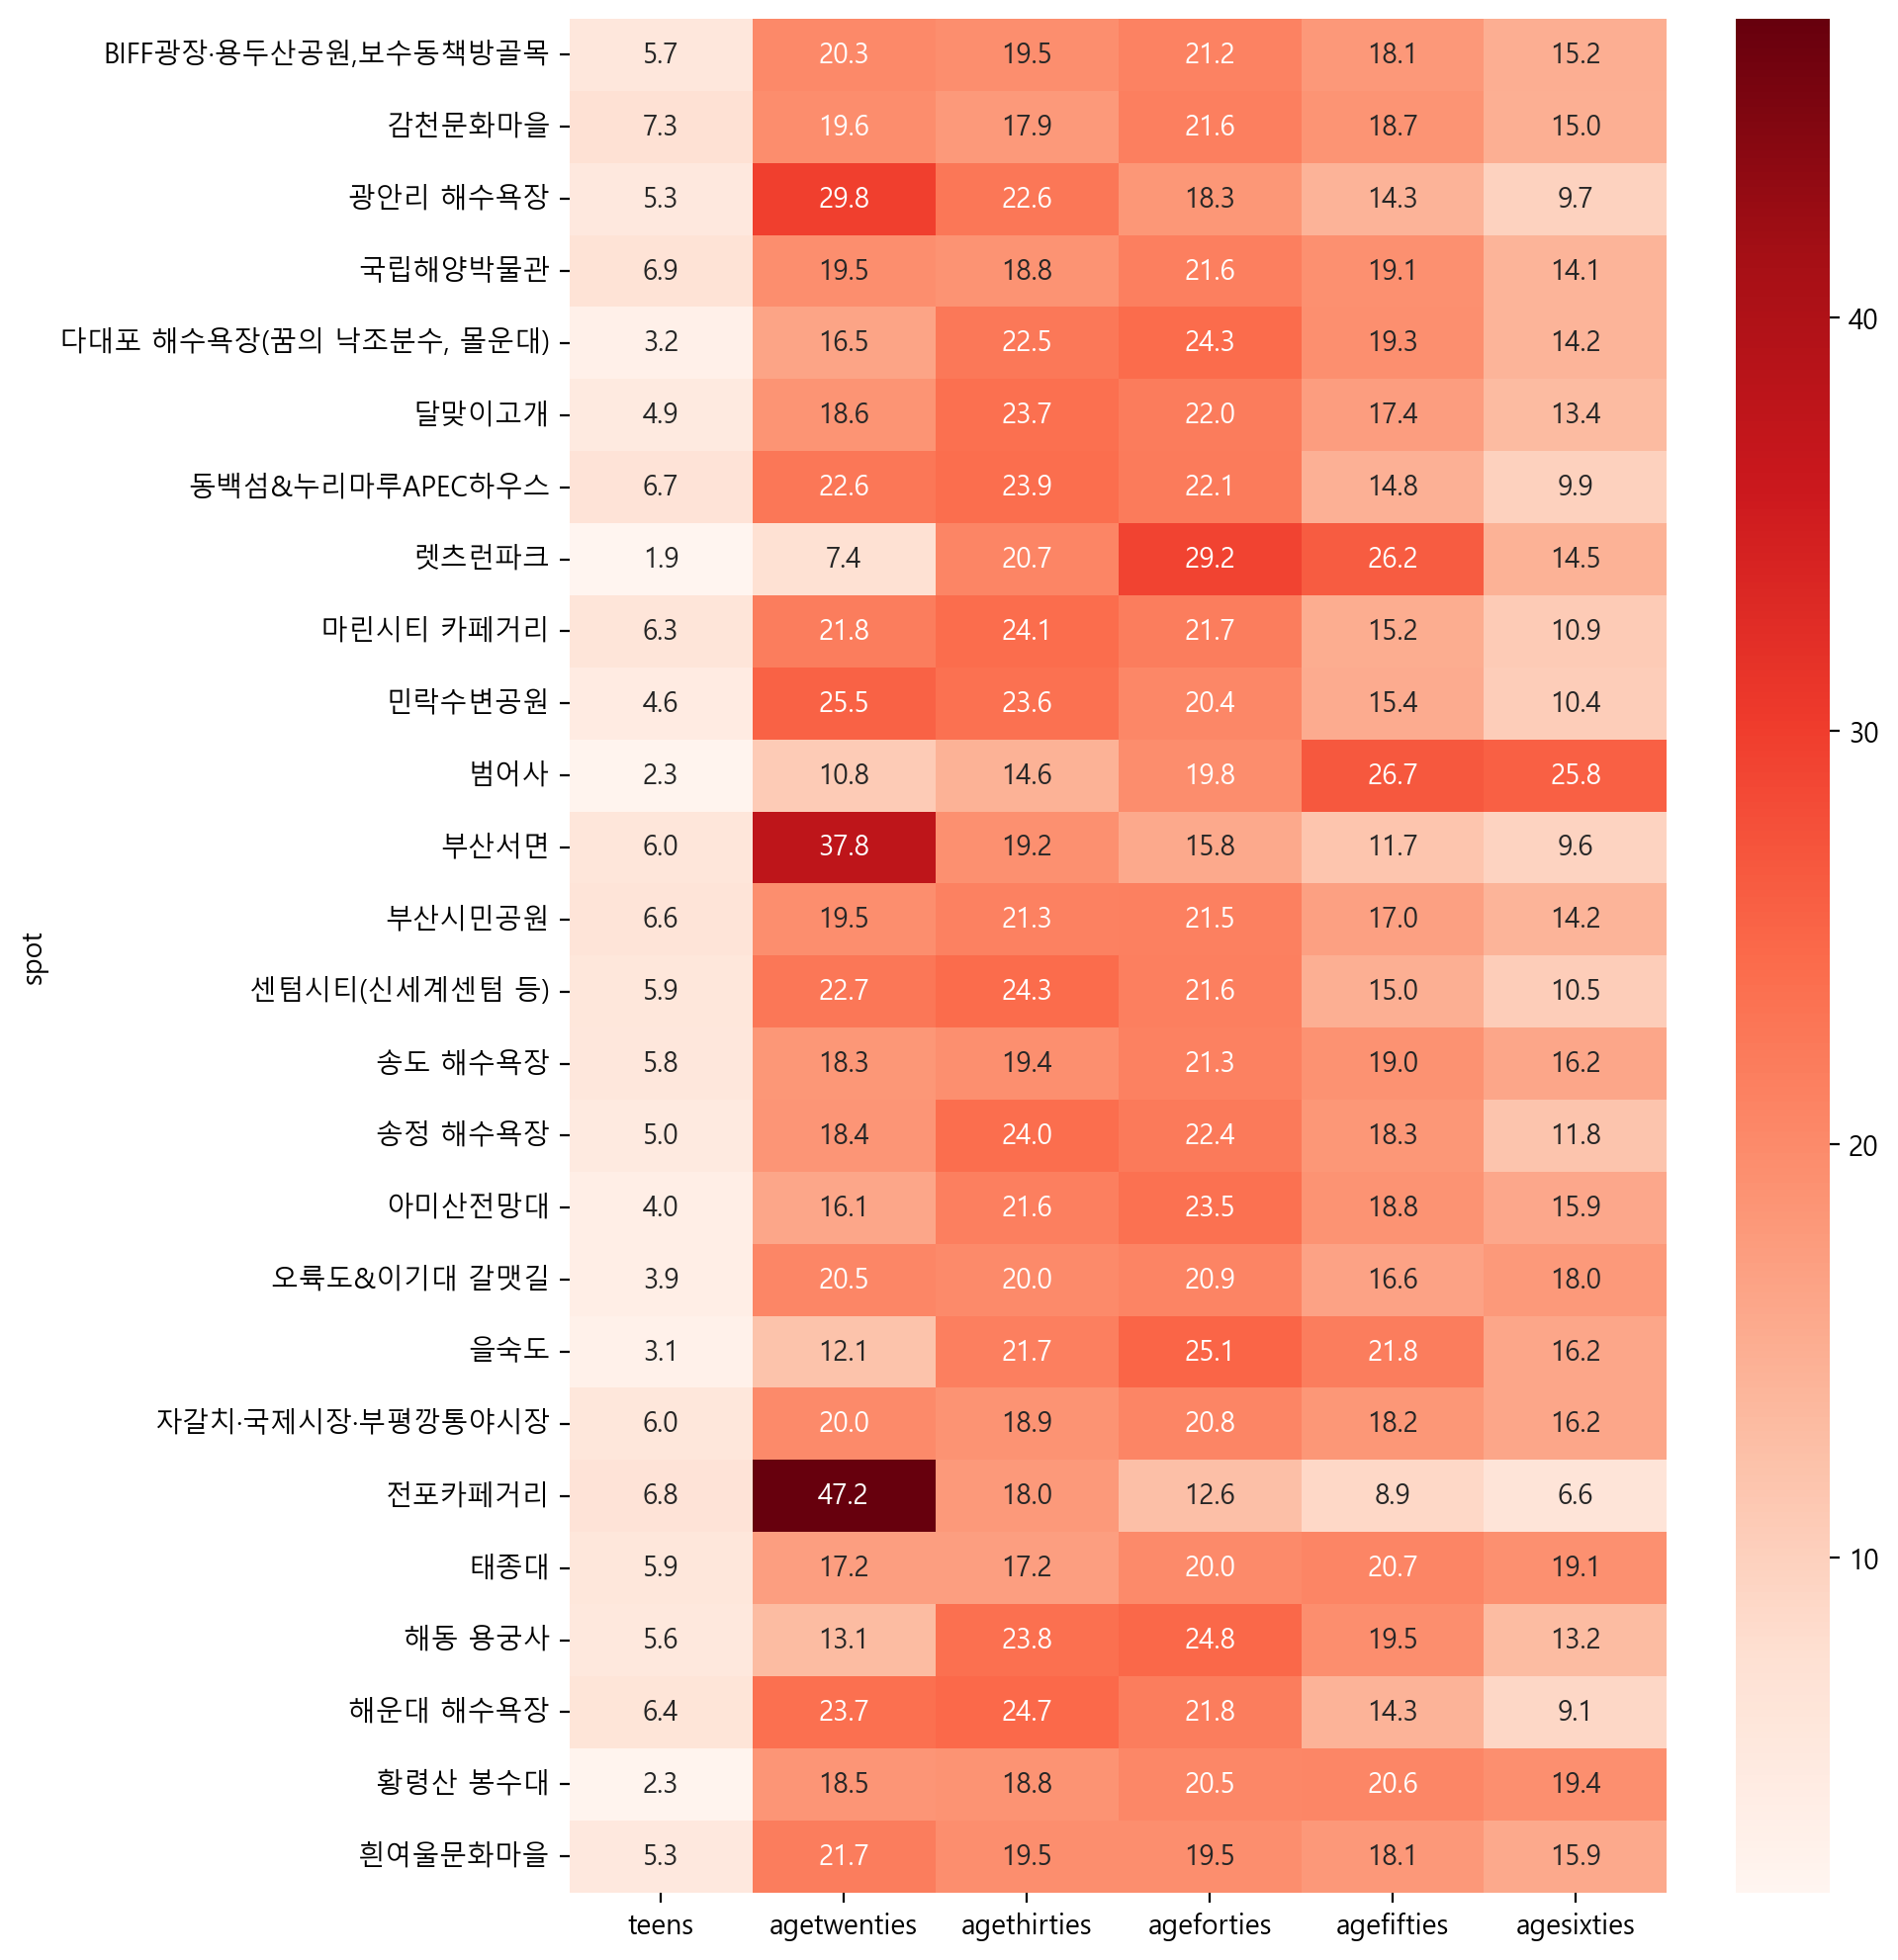

In [117]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_visitor_age, annot = True, fmt = ".1f", square = False, cmap = "Reds")
plt.tight_layout()
plt.savefig('부산시_관광지별_인구비율.jpg')
plt.show()

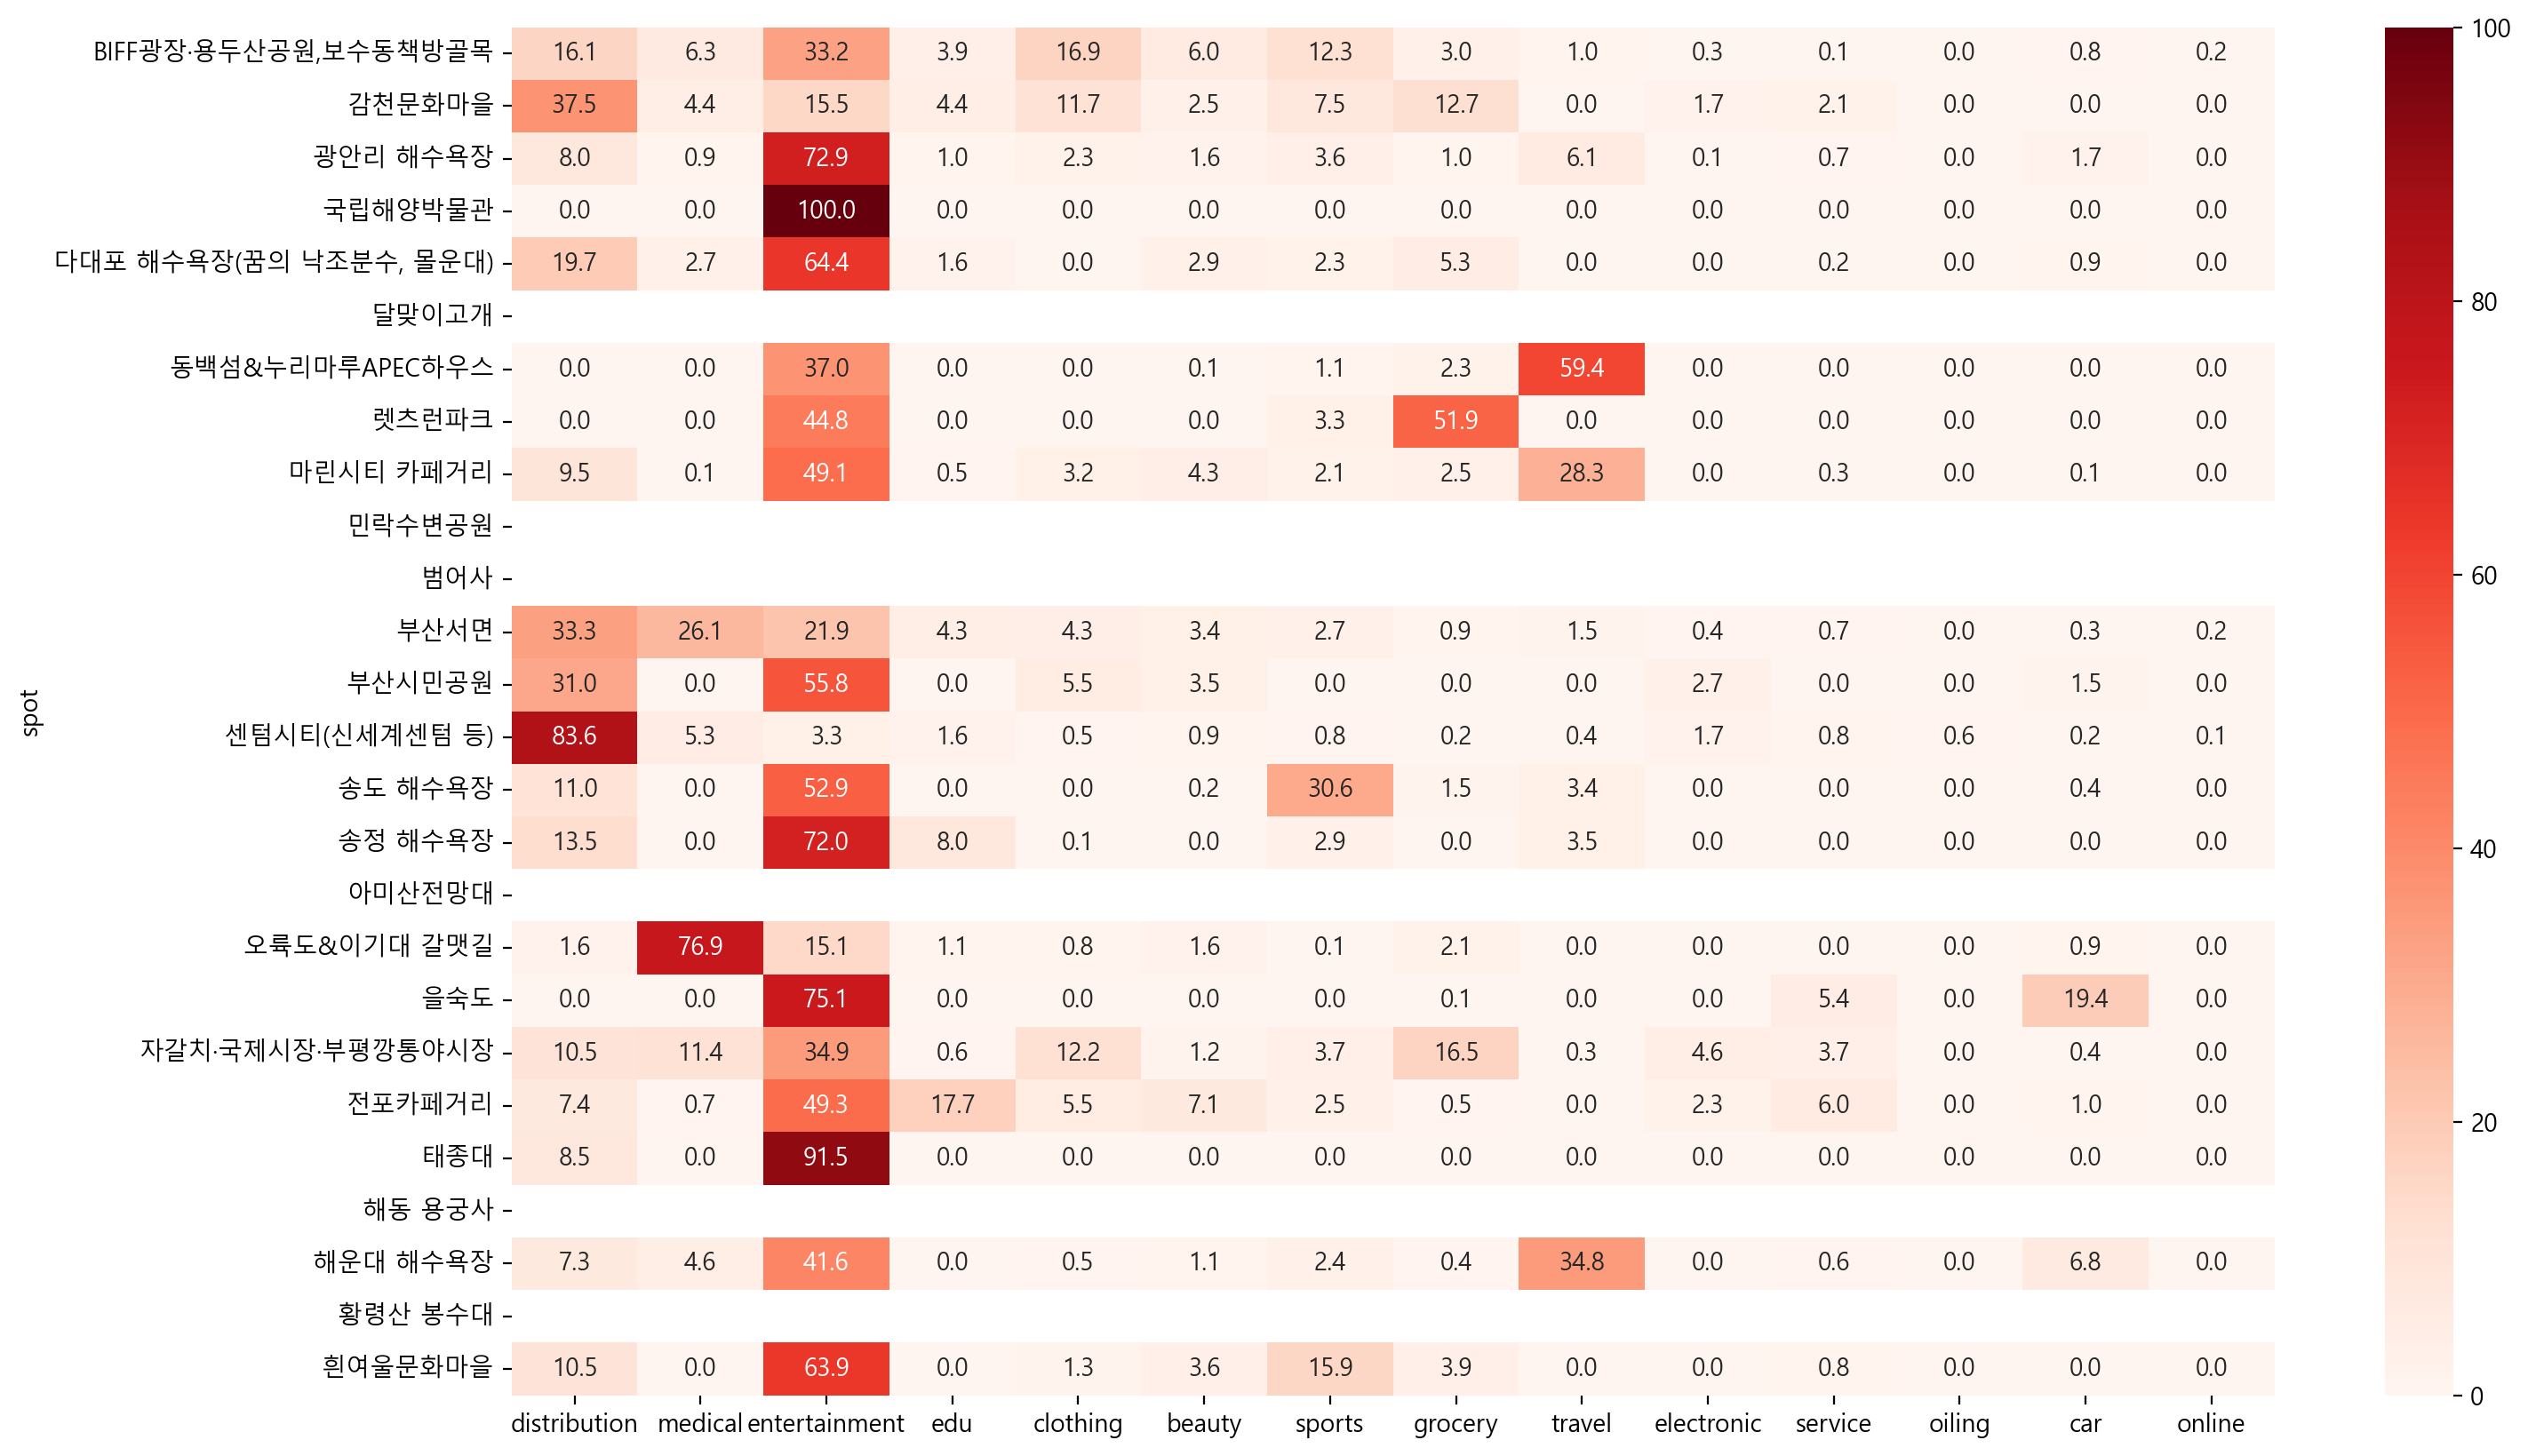

In [118]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_visitor_expeniture, annot = True, fmt = ".1f", square = False, cmap = "Reds")
plt.show()

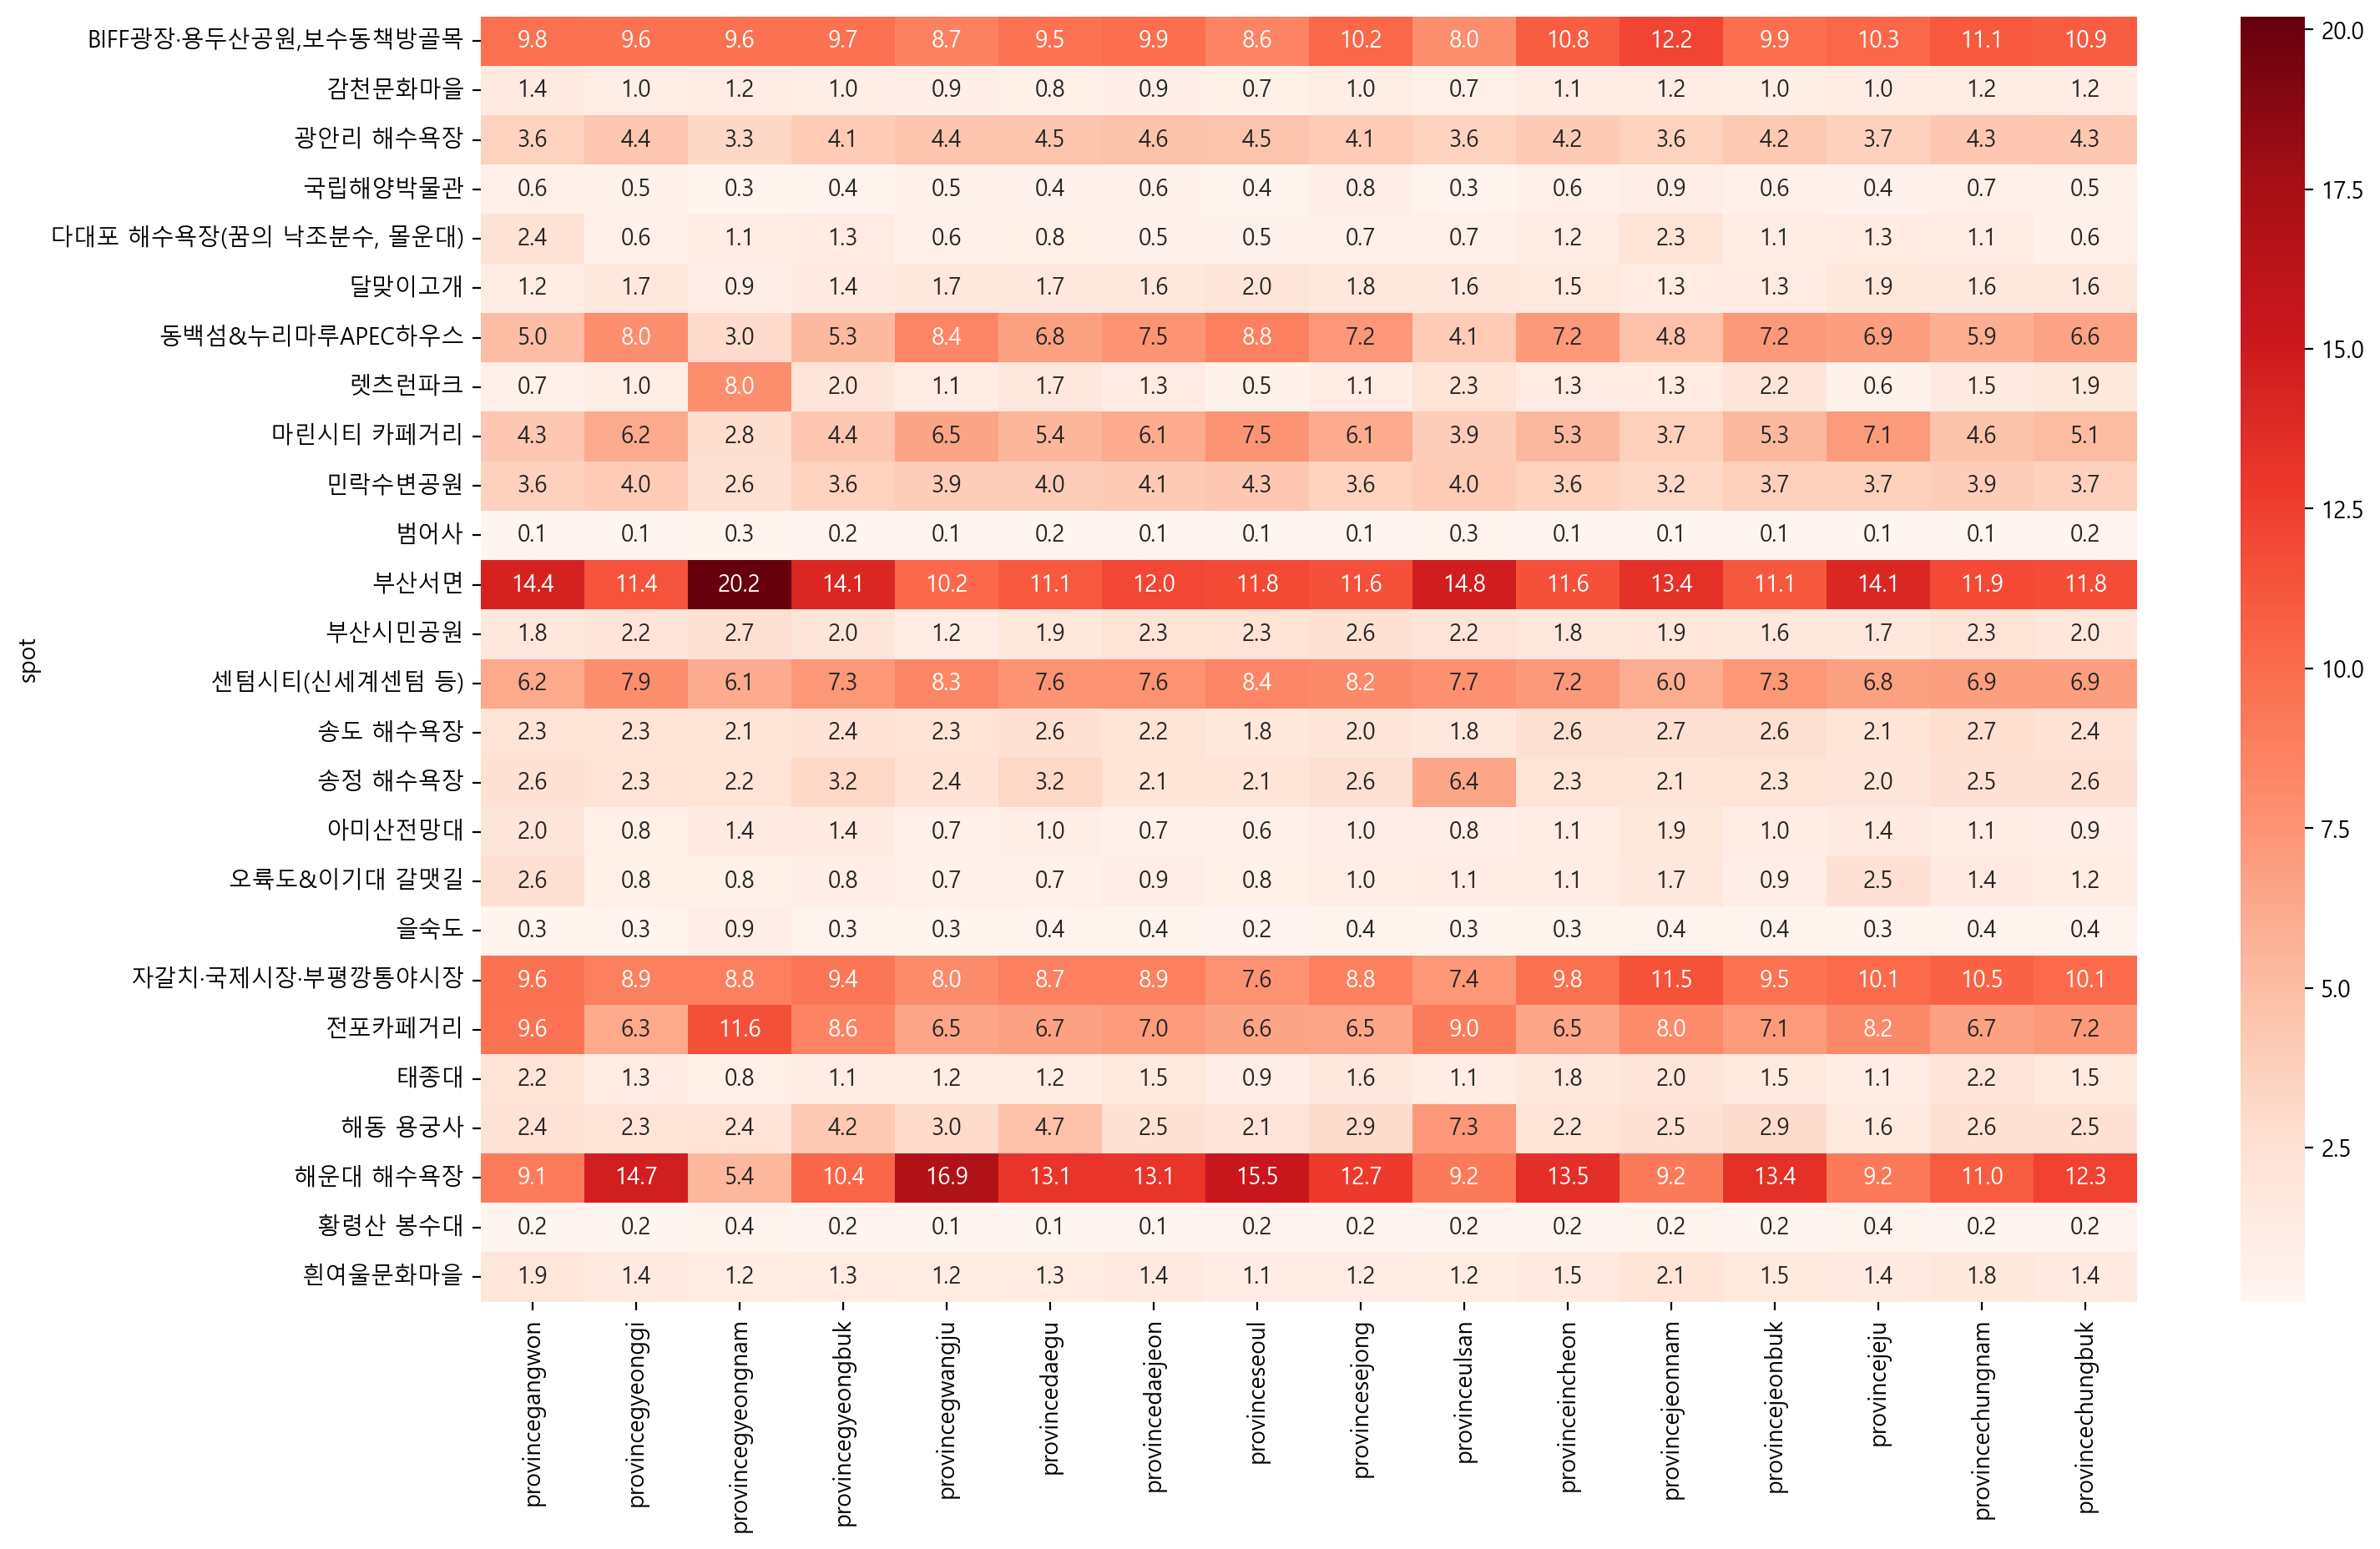

In [119]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_visitor_province, annot = True, fmt = ".1f", square = False, cmap = "Reds")
plt.show()

---

## 부산광역시_부산명소정보

In [126]:
url = 'http://apis.data.go.kr/6260000/AttractionService/getAttractionKr'
params ={'serviceKey' : decoding, 
         'numOfRows' : '4000', 
         'pageNo' : '1',
         'resultType' : 'json' }

response = requests.get(url, params=params)
contents = response.content

In [132]:
json_attraction = json.loads(contents)
# json_attraction

In [133]:
body = json_attraction['getAttractionKr']['item']
df_busan_attraction = pd.json_normalize(body)
df_busan_attraction.head()

,UC_SEQ,MAIN_TITLE,GUGUN_NM,LAT,LNG,PLACE,TITLE,SUBTITLE,ADDR1,CNTCT_TEL,HOMEPAGE_URL,TRFC_INFO,USAGE_DAY,HLDY_INFO,USAGE_DAY_WEEK_AND_TIME,USAGE_AMOUNT,MIDDLE_SIZE_RM1,MAIN_IMG_NORMAL,MAIN_IMG_THUMB,ITEMCNTNTS
0,255,흰여울문화마을,영도구,35.078850,129.04402,흰여울문화마을,가파른 절벽 끝에 흰여울문화마을,흰여울길에서 만난 느림의 미학,부산광역시 영도구 흰여울길,051-419-4067,http://www.ydculture.com/huinnyeoulculturetown/,"도시철도 1호선 남포역 6번 출구 → 7, 71, 508 버스 환승 → 영선동 백련...",,,매일,무료,"장애인 주차장(절영해안산책로 공영주차장, 유료)",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,절영해안산책로 가파른 담벼락 위로 독특한 마을 풍경이 보인다. 해안가 절벽 끝에 바...
1,256,깡깡이 예술마을,영도구,35.092648,129.03255,깡깡이 예술마을,역사가 살아 숨 쉬는 깡깡이예술마을,역사와 예술이 공존하는 곳,부산광역시 영도구 대평북로 36 깡깡이 안내센터,051-418-3336,http://kangkangee.com,도시철도 1호선 남포역 (6번출구) 도보 18분 \n마을버스 영도구2 대평동 하차 ...,,매주 월요일 (투어 등 시설),"평일, 주말 10:00~17:00\n가급적 평일 낮 시간 제외, 주말 혹은 통합투어...",프로그램별 상이,휠체어 접근 가능,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,영도다리 건너 자갈치시장 맞은 편 물양장에 배들이 가득 들어차 있다. 세상에 못 고...
2,257,"국립해양박물관(한,영,중간,중번,일)",영도구,35.078728,129.08018,국립해양박물관,해양 문화의 꽃 국립해양박물관,"해양, 어디까지 알고 있니?",부산광역시 영도구 해양로301번길 45,051-309-1900,https://www.mmk.or.kr/,"도시철도 1호선 남포역 6번 출구 → 186, 66번 버스 환승 → 국립해양박물관 ...",,매주 월요일,국립해양박물관 \n-화 ~ 금 09:00~18:00(입장 17:30분까지) \n-토...,"관람료 무료(단, 4D영상관, 유료특별전시 제외)","물품보관소(1, 2층), 휠체어 무료대여, 점자 블록, 점자안내판, 안내견 동반출입...",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,"부산하면 바다, 바다하면 부산이라고들 하지만 우리는 대한민국 해양에 대해 얼마나 알..."
3,258,태종대,영도구,35.052643,129.08780,태종대 유원지,영도 등대와 함께한 100년 태종대,"가족. 연인, 친구와 함께라면 더없이 좋은",부산광역시 영도구 전망로 24,051-405-8745,https://www.bisco.or.kr/taejongdae/,"도시철도 1호선 부산역 7번 출구 → 17, 88, 101 버스 환승 → 태종대(...",,,하절기 3~10월(04:00~24:00) / 동절기 11~2월(05:00~24:00),무료 (다누비 열차 요금 별도),"장애인 주차장, 장애인 화장실, 안내견 동반 가능, 다누비열차 휠체어리프트 장착 차...",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,초록으로 우거진 싱그러운 숲길을 거닐며 푸른 바다를 한눈에 바라볼 수 있는 곳. 오...
4,259,죽성성당,기장군,35.241013,129.24864,죽성성당,기장바다의 색다른 풍경 죽성성당,드라마 세트장의 놀라운 변화,부산광역시 기장군 기장읍 죽성리 134-7,,,도시철도 동해선 기장역 1번 출구 -> 기장성당 정류장 마을버스 환승 6 -> 죽성...,,,상시,무료,휠체어 접근 가능,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,동해바다의 에메랄드빛을 고스란히 담고 있는 기장 앞바다는 이제 많은 이들이 찾는 곳...


In [134]:
df_busan_attraction["MAIN_TITLE"].unique()

array(['흰여울문화마을', '깡깡이 예술마을', '국립해양박물관(한,영,중간,중번,일)', '태종대', '죽성성당',
       '아홉산 숲 (한,영,중간,중번,일)', '해동용궁사 (한,영,중간,중번,일)', '임랑해수욕장',
       '문화공감 수정, 초량1941(한,영,중간,중번,일)', '부산바다의 과거와 현재, 일광해수욕장',
       '구 백제병원 (한,영,중간,중번,일)', '백산기념관', '한성1918 부산생활문화센터(한,영,중간,중번,일)',
       '조선통신사역사관(한,영,중간,중번,일)', '부산해양자연사박물관', '보수동책방골목',
       '임시수도기념관(한,영,중간,중번,일)', '동아대석당박물관(한,영,중간,중번,일)',
       '국립일제강제동원역사관(한,영,중간,중번,일)', '부산박물관',
       '유엔기념공원, 유엔평화기념관(한,영,중간,중번,일)', '오륙도', '신선대', '송정해수욕장, 죽도공원',
       '힐튼부산 이터널저니(한,영,중간,중번,일)', '민락수변공원', '송도해수욕장(한,영,중간,중번,일)',
       '아미산전망대', '아미동 비석마을', '부산시립미술관', '오랑대공원', '국립수산과학관', '요산문학관',
       '박차정의사 생가', '우장춘 기념관', '누리바라기전망대', '최민식갤러리(한,영,중간,중번,일)', '수영사적공원',
       '부산기상관측소', '철새와 함께하는 아름다운 문화의 향연, 을숙도(한,영,중간,중번,일)', '부산시청자미디어센터',
       '구포어린이교통공원(한,영,중간,중번,일)', '부산솔로몬로파크', '부산어촌민속관', '삼락생태공원',
       '암남공원, 송도해안볼레길', '장림포구 (부네치아)', '가덕도', '렛츠런파크 부산경남', '국립부산과학관',
       '송상현광장', '어린이대공원', '국립부산국악원', '삼광사', '청사포와 미포', '부산시민공원',
       '호천마을(한,영,중간,

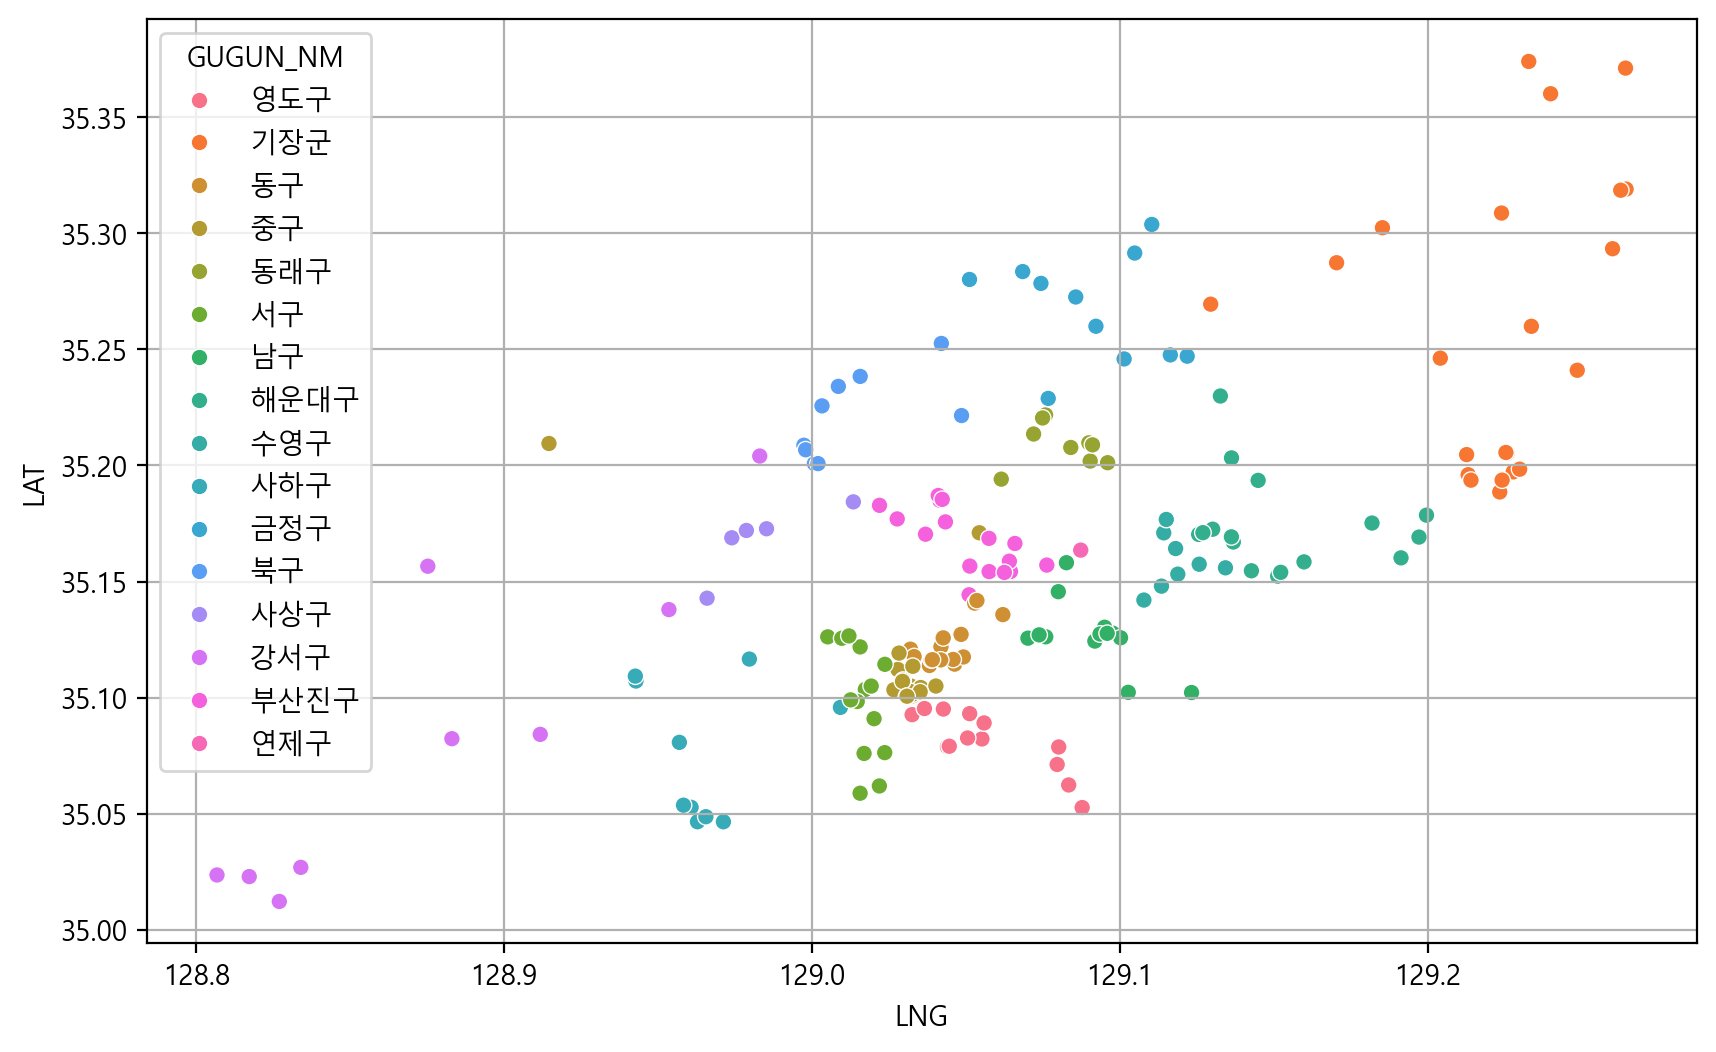

In [137]:
plt.figure(figsize = (10,6))
sns.scatterplot(
    x = df_busan_attraction["LNG"],
    y = df_busan_attraction["LAT"], 
    hue = df_busan_attraction["GUGUN_NM"]
)
plt.grid(True)
plt.show()

## 부산광역시_부산쇼핑정보

In [139]:
url = 'http://apis.data.go.kr/6260000/ShoppingService/getShoppingKr'
params ={'serviceKey' : decoding, 
         'numOfRows' : '4000', 
         'pageNo' : '1',
         'resultType' : 'json' }

response = requests.get(url, params=params)
contents = response.content

json_shopping = json.loads(contents)
json_shopping

body = json_shopping['getShoppingKr']['item']
df_busan_shopping = pd.json_normalize(body)
df_busan_shopping.head()

,UC_SEQ,MAIN_TITLE,GUGUN_NM,LAT,LNG,PLACE,TITLE,SUBTITLE,MAIN_PLACE,ADDR1,...,HOMEPAGE_URL,TRFC_INFO,USAGE_DAY,HLDY_INFO,USAGE_DAY_WEEK_AND_TIME,USAGE_AMOUNT,MIDDLE_SIZE_RM1,MAIN_IMG_NORMAL,MAIN_IMG_THUMB,ITEMCNTNTS
0,292,"기장시장(한,영,중간,중번,일)",기장군,35.243847,129.21524,기장시장,좌판의 힘 기장시장,,기장시장,부산광역시 기장군 기장읍 읍내로104번길 16,...,http://gijangmarket.modoo.at,"버스 188, 기장군11, 기장군2(학리), 기장군3(서생) 기장시장‧농협 하차\n...",,연중무휴,매일 07:00~22:00,가게별 상이,,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,알록달록 파라솔 사이로 정이 넘치는 기장 아지매들의 환한 미소가 빛난다. 바다에서 ...
1,293,"민락회타운(한,영,중간,중번,일)",수영구,35.155643,129.12370,민락회타운,광안리 바다의 참맛 민락회타운,,민락회타운,부산광역시 수영구 민락수변로 1,...,,도시철도 2호선 광안역 3번 출구 도보 18분\n버스 210 진로비치아파트 하차 /...,,연중무휴,매일 09:00~02:00(가게별 상이),가게별 상이,"장애인 화장실, 휠체어 접근 가능",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,광안리 바다와 광안대교를 바라보며 들어서 있는 민락회타운. 1층 활어판매시장에서 횟...
2,294,"해운대시장(한,영,중간,중번,일)",해운대구,35.161650,129.16210,해운대시장,텔레비전에 나온 시장맛집 해운대시장,,해운대시장,부산 해운대구 중동1로 42-16,...,,"도시철도 2호선 해운대역 3번 출구 도보 5분\n버스 100, 115-1, 141,...",,연중무휴,09:00 - 22:00,가게별 상이,휠체어 접근 가능,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,해운대 해수욕장과 5분 거리에 위치한 해운대시장은 다양한 먹거리와 볼거리로 항상 북...
3,300,남항시장 / 봉래시장,영도구,35.088760,129.04222,남항시장 / 봉래시장,영도 토박이 남항시장 & 봉래시장,,남항시장 / 봉래시장,남항시장 : 부산 영도구 영선동2가 245\n봉래시장 : 부산 영도구 태종로 159-15,...,,"남항시장\n도시철도 1호선 남포역 6번 출구 도보 25분\n버스 82, 85 남항시...",,"1, 3주 일요일",매일(휴무일 제외) 09:00~21:00,점포별 상이,,https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,영도의 오랜 정취가 살아있는 남항시장과 봉래시장으로 가족나들이 어떠세요?\n남항시장...
4,327,부전시장,부산진구,35.162804,129.06134,부전마켓타운,기억의 장터 부전마켓타운,,부전마켓타운,부산광역시 부산진구 중앙대로 786 10,...,https://bjmarket.modoo.at/,"도시철도 1호선 부전역 1번 출구 도보 3분\n버스 1, 110-1, 129-1, ...",,가게별 상이,월~일 07:00~19:00(가게별 상이),점포별 상이,"장애인 주차구역, 휠체어접근 가능",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,"한국전쟁 이후 피난민들이 모여 일군 삶의 터전, 부전시장. 지금은 부전마켓타운이라는..."


---

## 부산광역시_부산맛집정보

In [149]:
url = 'http://apis.data.go.kr/6260000/FoodService/getFoodKr'
params ={'serviceKey' : decoding, 
         'numOfRows' : '4000', 
         'pageNo' : '1',
         'resultType' : 'json' }

response = requests.get(url, params=params)
contents = response.content
json_foodservice = json.loads(contents)

body = json_foodservice['getFoodKr']['item']
df_busan_foodservice = pd.json_normalize(body)
df_busan_foodservice = df_busan_foodservice.loc[~(df_busan_foodservice['LNG'] < 100),:]
df_busan_foodservice.head()

,UC_SEQ,MAIN_TITLE,GUGUN_NM,LAT,LNG,PLACE,TITLE,SUBTITLE,ADDR1,ADDR2,CNTCT_TEL,HOMEPAGE_URL,USAGE_DAY_WEEK_AND_TIME,RPRSNTV_MENU,MAIN_IMG_NORMAL,MAIN_IMG_THUMB,ITEMCNTNTS
0,70,만드리곤드레밥,강서구,35.177387,128.95245,만드리곤드레밥,만드리곤드레밥,,강서구 공항앞길 85번길 13,,051-941-3669,,10:00-20:00\n(19:50 라스트오더),"돌솥곤드레정식, 단호박오리훈제",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,"곤드레밥에는 일반적으로 건조 곤드레나물이 사용되는데,\n이곳은 생 곤드레나물을 사용..."
1,77,민물가든,강서구,35.160550,128.89468,민물가든,민물가든,민물가든,강서구 둔치중앙길5(봉림동),,051-971-8428,https://blog.naver.com/rladba1,24.03.12 ~ 24. 12.31 휴업중\n11:00a.m. ~ 21:00p.m...,"묵은지붕어조림, 붕어찜",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,"30년간 운영해온 생선찜전문점으로, 전통방식인 나무통을 사용하여 조리하는 것이 특징..."
2,94,가야할매밀면,연제구,35.185196,129.07988,가야할매밀면,가야할매밀면,가야할매밀면,부산 연제구 월드컵대로 145번길 32\n,,051-865-8017,,11:00-20:00,"물 밀면, 비빔밀면\n",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,"유명한 밀면전문점으로, 밀가루에 옥수수 전분을 섞어, 다른 밀면전문점들보다 더 탄력..."
3,95,국제밀면본점,연제구,35.196890,129.07785,국제밀면본점,국제밀면본점,,연제구 중앙대로1235번길 23-6,,051-501-5507,,10:00-20:00 (라스트오더 19:30)\n5~8월 10:00-21:00 (라...,"물밀면, 비빔밀면",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,밀면전문점 중에서도 특히 맛으로 소문난 이곳은\n소 사골만을 사용한 육수 등 독창적...
4,102,할매가야밀면,중구,35.098934,129.03122,할매가야밀면,할매가야밀면,,중구 광복로 56-14,,051-246-3314,,10:30-21:30,"밀면, 비빔밀면",https://www.visitbusan.net/uploadImgs/files/cn...,https://www.visitbusan.net/uploadImgs/files/cn...,"깔끔한 맛의 육수가 인상적인 40년 전통의 밀면 전문점으로, \n식사시간에는 항상 ..."


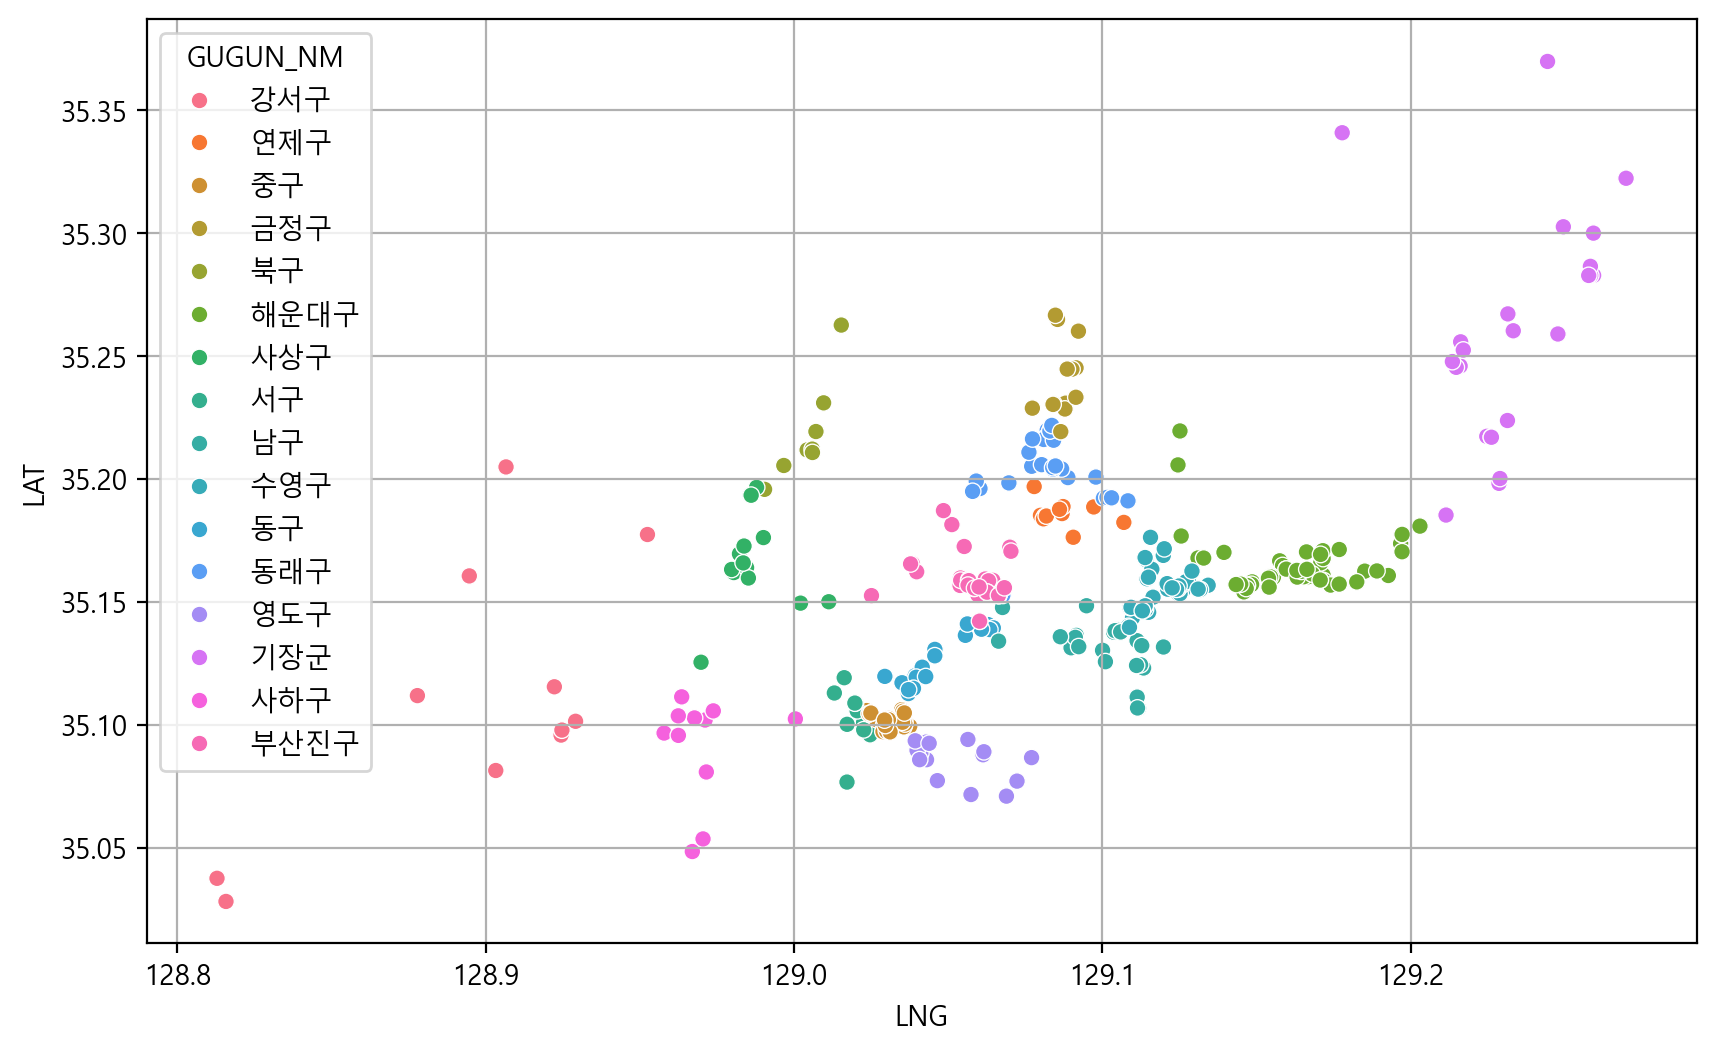

In [151]:
plt.figure(figsize = (10,6))
sns.scatterplot(
    x = df_busan_foodservice["LNG"], 
    y = df_busan_foodservice["LAT"], 
    hue = df_busan_foodservice["GUGUN_NM"]
)
plt.grid(True)
plt.show()